<a href="https://colab.research.google.com/github/abdipourasl/Convex-Optimization-1402/blob/main/Convex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-success">
<h1>Convex Optimization Project #2<h1>
Amin Abdipour 401133011</h1>
</div>

# Q1

## Define MyGD

In [ ]:
import torch
import torch.nn as nn

class MyGD(torch.optim.Optimizer):
    def __init__(self, params, lr=0.001):
        defaults = dict(lr=lr)
        super(MyGD, self).__init__(params, defaults)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            with torch.enable_grad():
                loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                p.data.add_(-group['lr'], grad)

        return loss

## a) Optimization Problem <h1>
$ \min f(x_1, x_2) = \frac{x_2^2}{x_1^2}$ <h1>
Subject to $ x_2>0 $

### Define the objective function

In [ ]:
def objective(x1, x2):
    return x1**2 / x2**2

def grad_objective(x1, x2):
    grad_x1 = 2 * x1 / x2**2
    grad_x2 = -2 * x1**2 / x2**3
    return torch.tensor([grad_x1, grad_x2])

# Initial values
x1 = torch.tensor([1.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

### Use MyGD

In [ ]:
optimizer = MyGD([x1, z], lr=0.01)

### GD Loop

In [ ]:
for i in range(1000):
    x2 = torch.exp(z)
    loss = objective(x1, x2)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    # Print or log the iteration information
    print(f'Iteration {i + 1}/{1000}, x1: {x1.item()}, x2: {x2.item()}, Loss: {loss.item()}')

Iteration 1/1000, x1: 0.9800000190734863, x2: 1.0, Loss: 1.0
Iteration 2/1000, x1: 0.9611685276031494, x2: 1.020201325416565, Loss: 0.9227423071861267
Iteration 3/1000, x1: 0.9433681964874268, x2: 1.0392037630081177, Loss: 0.8554559350013733
Iteration 4/1000, x1: 0.9264852404594421, x2: 1.0571366548538208, Loss: 0.7963430881500244
Iteration 5/1000, x1: 0.9104242324829102, x2: 1.074108362197876, Loss: 0.7440134882926941
Iteration 6/1000, x1: 0.8951044678688049, x2: 1.0902107954025269, Loss: 0.697375476360321
Iteration 7/1000, x1: 0.880456805229187, x2: 1.1055231094360352, Loss: 0.6555590629577637
Iteration 8/1000, x1: 0.8664217591285706, x2: 1.1201132535934448, Loss: 0.6178630590438843
Iteration 9/1000, x1: 0.8529475927352905, x2: 1.1340405941009521, Loss: 0.5837158560752869
Iteration 10/1000, x1: 0.8399890661239624, x2: 1.1473573446273804, Loss: 0.552646279335022
Iteration 11/1000, x1: 0.827506422996521, x2: 1.1601094007492065, Loss: 0.5242632031440735
Iteration 12/1000, x1: 0.81546449

In [ ]:
x2 = torch.exp(z)
final_result = (x1.item(), x2.item())
print(f'Optimal solution: x1 = {final_result[0]}, x2 = {final_result[1]}, Minimum value: {objective(*final_result)}')

Optimal solution: x1 = 0.00043399748392403126, x2 = 1.654006004333496, Minimum value: 6.884941585300933e-08


## b) Classify MNIST Dataset with MyGD Optimizer

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### Load MNIST dataset

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

### Define Network

In [ ]:
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
model = MyNet()
optimizer = MyGD(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

### Train

In [ ]:
loss_values = []

for epoch in range(20):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = loss_fn(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()
    loss_values.append(loss.item())

        # Print the loss
    print(f'Epoch [{epoch + 1}/{20}], Loss: {loss.item()}')

Epoch [1/20], Loss: 2.053619384765625
Epoch [2/20], Loss: 1.6897128820419312
Epoch [3/20], Loss: 0.949285089969635
Epoch [4/20], Loss: 0.7740514874458313
Epoch [5/20], Loss: 0.7070786952972412
Epoch [6/20], Loss: 0.6551414728164673
Epoch [7/20], Loss: 0.5353940725326538
Epoch [8/20], Loss: 0.4001172184944153
Epoch [9/20], Loss: 0.40212804079055786
Epoch [10/20], Loss: 0.2390829473733902
Epoch [11/20], Loss: 0.311837762594223
Epoch [12/20], Loss: 0.2997358441352844
Epoch [13/20], Loss: 0.4211260676383972
Epoch [14/20], Loss: 0.27513355016708374
Epoch [15/20], Loss: 0.2037477344274521
Epoch [16/20], Loss: 0.3633786737918854
Epoch [17/20], Loss: 0.1400723159313202
Epoch [18/20], Loss: 0.1475607454776764
Epoch [19/20], Loss: 0.25815147161483765
Epoch [20/20], Loss: 0.23419153690338135


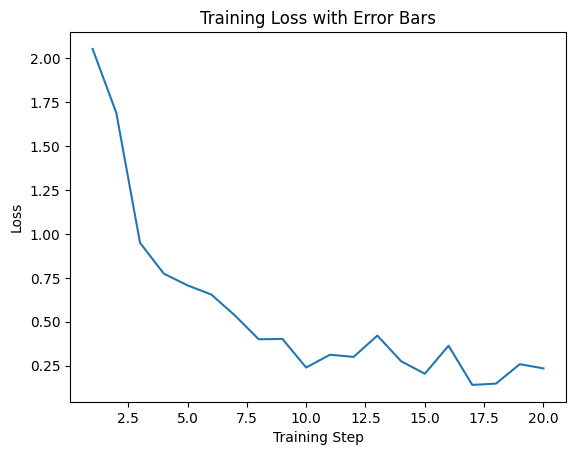

In [ ]:
from matplotlib import pyplot as plt
plt.errorbar(range(1, len(loss_values) + 1), loss_values, fmt='-', yerr=None, ecolor='red', capsize=5)
plt.title('Training Loss with Error Bars')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()

### Test Model

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {100 * accuracy:.2f}%')


Test Accuracy: 91.01%


# Q2

## Define Algorithms

### Backtracking Line Search Algorithm

In [5]:
def backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c):
    alpha = alpha_bar
    while f(x + alpha * p) > f(x) + c * alpha * grad_f(x).T @ p:
        alpha *= rho
    return alpha


### Contour Path

In [6]:
def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=20)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()


### Trust Region With Dogleg Method

In [7]:
import numpy as np
def dogleg_method(grad_f, hessian_f, delta):
    try:
        hessian_inv = np.linalg.inv(hessian_f)
    except np.linalg.LinAlgError:
        # Hessian is singular, use a different method or fallback strategy
        return -grad_f

    p_Unc = -hessian_inv @ grad_f
    if np.linalg.norm(p_Unc) <= delta:
        return p_Unc

    p_B = -(grad_f.T @ grad_f) / (grad_f.T @ hessian_f @ grad_f) * grad_f
    if np.linalg.norm(p_B) >= delta:
        return delta * p_B / np.linalg.norm(p_B)

    p_H = hessian_inv @ -grad_f
    a = np.linalg.norm(p_B - p_Unc) ** 2
    b = 2 * (p_B - p_Unc).T @ (p_Unc - p_H)
    c = np.linalg.norm(p_Unc - p_H) ** 2 - delta ** 2
    tau = (-b + np.sqrt(b ** 2 - 4 * a * c)) / (2 * a)
    return p_Unc + tau * (p_B - p_Unc)


## Newton Algorithm with $ x_0 = (1.2,1.2)^T$

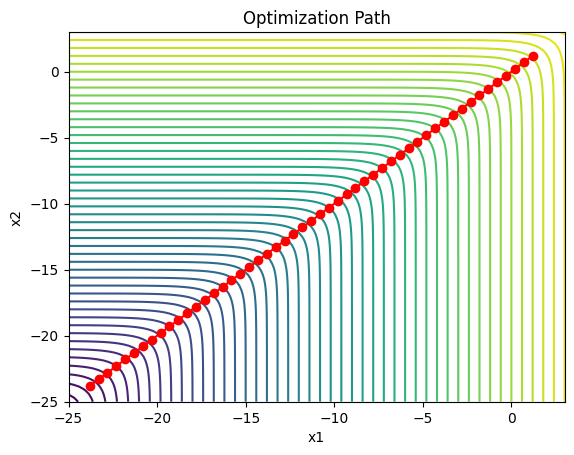

In [8]:
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])

def hessian_objective_function(x):
    return np.array([[np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[0]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      -np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)],
                     [-np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[1]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)]])

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()

# Initial values
x0 = np.array([1.2, 1.2])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# Backtracking line search optimization
x = x0.copy()
path_backtracking = [x]
for _ in range(50):  # Limiting the number of iterations for illustration purposes
    grad = grad_objective_function(x)
    hessian = hessian_objective_function(x)
    p = dogleg_method(grad, hessian, delta)
    alpha = backtracking_line_search(objective_function, grad_objective_function, x, p, alpha_bar, rho, c)
    x = x + alpha * p
    path_backtracking.append(x)

# Plot the optimization path for backtracking line search
X, Y = np.meshgrid(np.linspace(-25, 3, 100), np.linspace(-25, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_backtracking)


## Newton Algorithm with $ x_0 = (-1.2,1)^T$

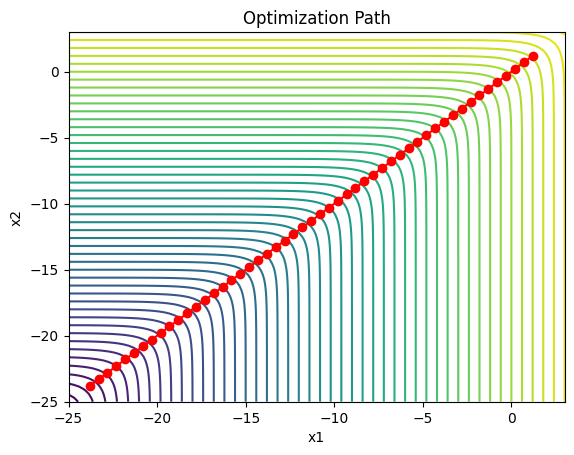

In [9]:
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])

def hessian_objective_function(x):
    return np.array([[np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[0]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      -np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)],
                     [-np.exp(x[0]) * np.exp(x[1]) / ((np.exp(x[0]) + np.exp(x[1])) ** 2),
                      np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1])) -
                      (np.exp(x[1]) ** 2) / ((np.exp(x[0]) + np.exp(x[1])) ** 2)]])

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()

# Initial values
x0 = np.array([1.2, 1.2])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# Backtracking line search optimization
x = x0.copy()
path_backtracking = [x]
for _ in range(50):  # Limiting the number of iterations for illustration purposes
    grad = grad_objective_function(x)
    hessian = hessian_objective_function(x)
    p = dogleg_method(grad, hessian, delta)
    alpha = backtracking_line_search(objective_function, grad_objective_function, x, p, alpha_bar, rho, c)
    x = x + alpha * p
    path_backtracking.append(x)

# Plot the optimization path for backtracking line search
X, Y = np.meshgrid(np.linspace(-25, 3, 100), np.linspace(-25, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_backtracking)


## BFGS Algorithm with $ x_0 = (1.2,1.2)^T , B=\frac{||g_0||}{\delta}I$

<ipython-input-10-05e5f87afb07>:15: RuntimeWarning: invalid value encountered in divide
  B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
<ipython-input-10-05e5f87afb07>:16: RuntimeWarning: invalid value encountered in divide
  np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
<ipython-input-10-05e5f87afb07>:17: RuntimeWarning: divide by zero encountered in divide
  ) + np.outer(s, s) / np.dot(y, s)


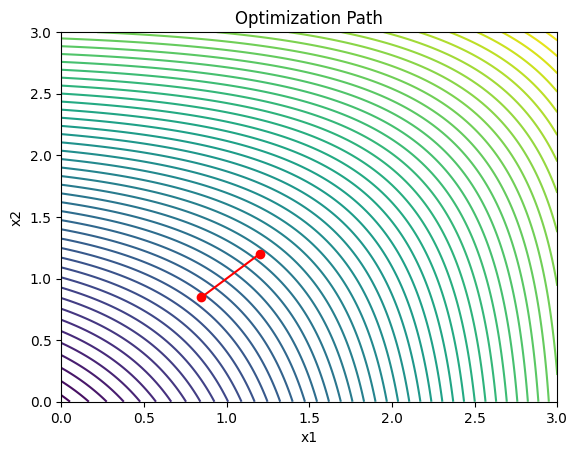

In [10]:
import numpy as np

def bfgs_optimizer(f, grad_f, x0, alpha_bar, rho, c, delta, max_iter=100):
    x = x0.copy()
    B_inv = (np.linalg.norm(grad_f(x0)) / delta) * np.eye(len(x0))

    path_bfgs = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        p = -B_inv @ grad
        alpha = backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad
        B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
            np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
        ) + np.outer(s, s) / np.dot(y, s)

        x = x_new
        path_bfgs.append(x)

    return path_bfgs

# Objective function and its derivatives
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
import matplotlib.pyplot as plt

def plot_contour_path(path):
    x_vals = [point[0] for point in path]
    y_vals = [point[1] for point in path]
    plt.contour(X, Y, Z, levels=50)
    plt.plot(x_vals, y_vals, marker='o', color='r')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Optimization Path')
    plt.show()


# Initial values
x0 = np.array([1.2, 1.2])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# BFGS optimization
path_bfgs = bfgs_optimizer(objective_function, grad_objective_function, x0, alpha_bar, rho, c, delta)

# Plot the optimization path for BFGS
X, Y = np.meshgrid(np.linspace(-0, 3, 100), np.linspace(-00, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_bfgs)


## BFGS Algorithm with $ x_0 = (-1.2,1)^T$ , $B=\frac{||g_0||}{\delta}I$

<ipython-input-15-2685eded6ef4>:26: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-15-2685eded6ef4>:29: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-15-2685eded6ef4>:30: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-15-2685eded6ef4>:47: RuntimeWarning: divide by zero encountered in log
  Z = np.log(np.exp(X) + np.exp(Y))


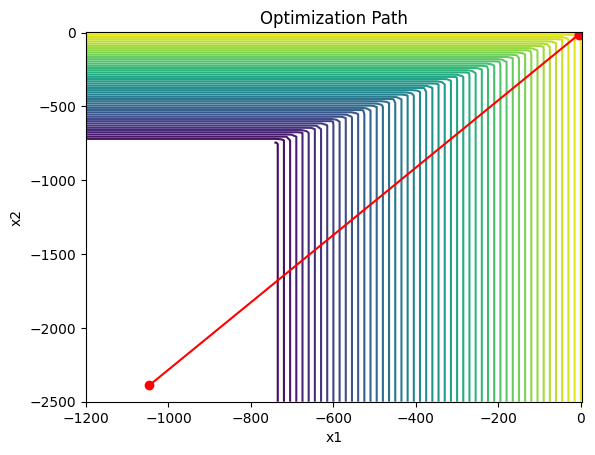

In [15]:
import numpy as np

def bfgs_optimizer(f, grad_f, x0, alpha_bar, rho, c, delta, max_iter=100):
    x = x0.copy()
    B_inv = (np.linalg.norm(grad_f(x0)) / delta) * np.eye(len(x0))

    path_bfgs = [x]
    for _ in range(max_iter):
        grad = grad_f(x)
        p = -B_inv @ grad
        alpha = backtracking_line_search(f, grad_f, x, p, alpha_bar, rho, c)
        x_new = x + alpha * p
        s = x_new - x
        y = grad_f(x_new) - grad
        B_inv = (np.eye(len(x)) - np.outer(s, y) / np.dot(y, s)) @ B_inv @ (
            np.eye(len(x)) - np.outer(y, s) / np.dot(y, s)
        ) + np.outer(s, s) / np.dot(y, s)

        x = x_new
        path_bfgs.append(x)

    return path_bfgs

# Objective function and its derivatives
def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
import matplotlib.pyplot as plt



# Initial values
x0 = np.array([-1.2, 1])
alpha_bar = 1.0
rho = 0.8
c = 0.1
delta = 1

# BFGS optimization
path_bfgs = bfgs_optimizer(objective_function, grad_objective_function, x0, alpha_bar, rho, c, delta)

# Plot the optimization path for BFGS
X, Y = np.meshgrid(np.linspace(-1200, 3, 100), np.linspace(-2500, 3, 100))
Z = np.log(np.exp(X) + np.exp(Y))
plot_contour_path(path_bfgs)


## BFGS Algorithm with $ x_0 = (1.2,1.2)^T$ , $B=\frac{y_1^Ty_1}{y_1^Ts_1}I$

<ipython-input-12-774756880809>:11: OptimizeWarning: Unknown solver options: initial_hessian
  result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
<ipython-input-12-774756880809>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-12-774756880809>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-12-774756880809>:36: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-12-774756880809>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-12-774756880809>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-12-774756880809>:36: RuntimeWarning: invalid value encountered in double_sc

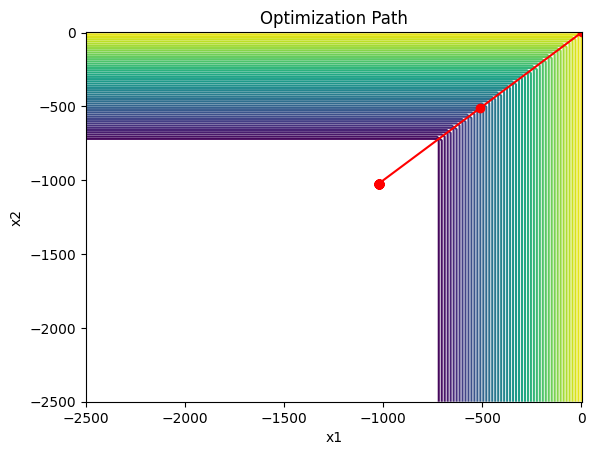

In [12]:
import numpy as np
from scipy.optimize import minimize

# BFGS optimization with specified initial Hessian approximation
def bfgs_with_initial_hessian(x0, delta):
    path = [x0]
    B = np.eye(len(x0))  # Initialize Hessian approximation

    for _ in range(50):  # Limiting the number of iterations for illustration purposes
        grad = grad_objective_function(x0)
        result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
                          options={'disp': False, 'gtol': 1e-5, 'eps': delta, 'initial_hessian': B})
        x_next = result.x
        grad_next = grad_objective_function(x_next)

        y = grad_next - grad
        s = x_next - x0

        B = B + np.outer(y, y) / np.dot(y, s) - (B @ np.outer(s, s) @ B) / np.dot(s, B @ s)

        x0 = x_next
        path.append(x0)

    return path

def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Initial values
x0 = np.array([1.2, 1.2])
delta = 1

# Define the gradient of the objective function
def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])


# Run BFGS with specified initial Hessian
path_bfgs_with_initial_hessian = bfgs_with_initial_hessian(x0, delta)

# Plot the optimization path for BFGS with specified initial Hessian
plot_contour_path(path_bfgs_with_initial_hessian)


## BFGS Algorithm with $ x_0 = (-1.2,1)^T$ , $B=\frac{y_1^Ty_1}{y_1^Ts_1}I$

<ipython-input-16-16e3b374708b>:11: OptimizeWarning: Unknown solver options: initial_hessian
  result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
<ipython-input-16-16e3b374708b>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-16-16e3b374708b>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-16-16e3b374708b>:36: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])
<ipython-input-16-16e3b374708b>:27: RuntimeWarning: divide by zero encountered in log
  return np.log(np.exp(x[0]) + np.exp(x[1]))
<ipython-input-16-16e3b374708b>:35: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
<ipython-input-16-16e3b374708b>:36: RuntimeWarning: invalid value encountered in double_sc

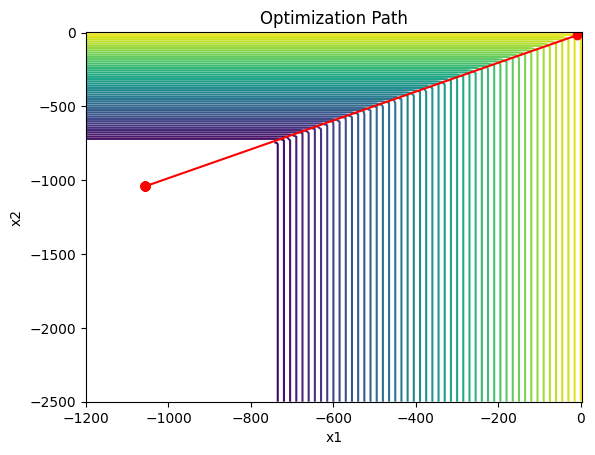

In [16]:
import numpy as np
from scipy.optimize import minimize

# BFGS optimization with specified initial Hessian approximation
def bfgs_with_initial_hessian(x0, delta):
    path = [x0]
    B = np.eye(len(x0))  # Initialize Hessian approximation

    for _ in range(50):  # Limiting the number of iterations for illustration purposes
        grad = grad_objective_function(x0)
        result = minimize(objective_function, x0, method='BFGS', jac=grad_objective_function,
                          options={'disp': False, 'gtol': 1e-5, 'eps': delta, 'initial_hessian': B})
        x_next = result.x
        grad_next = grad_objective_function(x_next)

        y = grad_next - grad
        s = x_next - x0

        B = B + np.outer(y, y) / np.dot(y, s) - (B @ np.outer(s, s) @ B) / np.dot(s, B @ s)

        x0 = x_next
        path.append(x0)

    return path

def objective_function(x):
    return np.log(np.exp(x[0]) + np.exp(x[1]))

# Initial values
x0 = np.array([-1.2, 1])
delta = 1

# Define the gradient of the objective function
def grad_objective_function(x):
    return np.array([np.exp(x[0]) / (np.exp(x[0]) + np.exp(x[1])),
                     np.exp(x[1]) / (np.exp(x[0]) + np.exp(x[1]))])


# Run BFGS with specified initial Hessian
path_bfgs_with_initial_hessian = bfgs_with_initial_hessian(x0, delta)

# Plot the optimization path for BFGS with specified initial Hessian
plot_contour_path(path_bfgs_with_initial_hessian)
